El hamiltoniano del sistema de espines está dado por

$$
\hat{H} = -J \sum_{j=1}^{N-1} \left( \hat{\sigma}_{j}^{x}
\hat{\sigma}_{j+1}^{x} + \hat{\sigma}_{j}^{y}
\hat{\sigma}_{j+1}^{y} \right) + U \sum_{j=1}^{N-1} \hat{\sigma}_{j}^{z}
\hat{\sigma}_{j+1}^{z} + \sum_{j=1}^{N} h_{j} \hat{\sigma}_{j}^{z}
$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from scipy.linalg import expm

import qc_calc_hamiltonian as qcch

In [2]:
J: float = 1
U: float = 1
h: float = 1

In [3]:
hamiltonian: npt.ArrayLike = qcch.calc_hamiltonian(3, J, U, h)

val, vec = qcch.calc_eigen(hamiltonian)

qcch.print_eigen(val, vec)
qcch.print_hamiltonian(hamiltonian)

In [4]:
state: npt.ArrayLike = [1, 1]
state = qcch.tensor_product(3, (state, 1), (state, 2), (state, 3))
print(np.linalg.norm(state))
print(state.shape)

state = qcch.normalize_vector(state)
print(np.linalg.norm(state))

adjoint_state: npt.NDArray = qcch.calc_adjoint(state)

qcch.calc_expectation_value(3, qcch.tensor_product(3, (qcch.sigma_y, 1)), state)

2.8284271247461903
(8,)
0.9999999999999999


(0.4999999999999999-0.4999999999999999j)

(100, 8, 8)


/home/aang/miniconda3/envs/env-principal/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


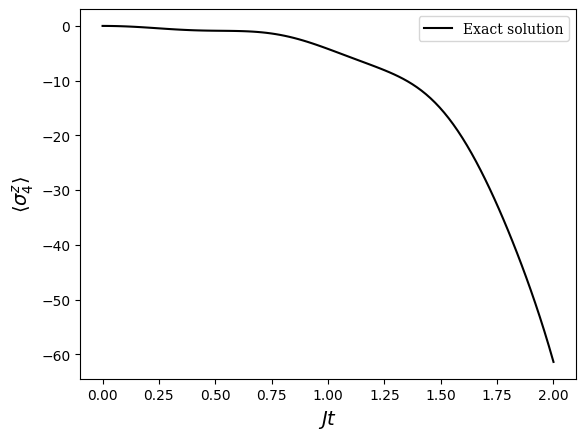

In [5]:
ts: npt.NDArray = np.linspace(0, 2, 100)

evol_ops: npt.NDArray = np.array([expm(-1j*t*hamiltonian) for t in ts])
print(evol_ops.shape)
# print(evol_ops)
evol_states: npt.NDArray = evol_ops.dot(state);

expect_vals: list[complex | float] = []

for evol_st in evol_states:
    expect_vals.append(qcch.calc_expectation_value(3, qcch.tensor_product(3, (qcch.sigma_z, 2)), evol_st))

plt.plot(J*ts, expect_vals, color='k', label='Exact solution')
plt.xlabel('$Jt$', fontsize=14)
plt.ylabel(r'$\langle \sigma_{4}^{z}  \rangle$', fontsize=14)
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend()